In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Vessels.csv')

In [3]:
df.head()

,Month,Vessel Traffic\n(In Nos)
0,01-01-1995,514
1,01-01-1996,507
2,01-01-1997,659
3,01-01-1998,741
4,01-01-1999,738


In [4]:
df.tail()

,Month,Vessel Traffic\n(In Nos)
21,01-01-2016,1270
22,01-01-2017,1455
23,01-01-2018,1388
24,01-01-2019,1346
25,01-01-2020,1358


In [5]:
df.columns=["Year","Vessels"]
df.head()

,Year,Vessels
0,01-01-1995,514
1,01-01-1996,507
2,01-01-1997,659
3,01-01-1998,741
4,01-01-1999,738


In [6]:
df['Year']=pd.to_datetime(df['Year'])

In [7]:
df.head()

,Year,Vessels
0,1995-01-01,514
1,1996-01-01,507
2,1997-01-01,659
3,1998-01-01,741
4,1999-01-01,738


In [8]:
df.set_index('Year',inplace=True)
df.head()

,Vessels
Year,
1995-01-01,514
1996-01-01,507
1997-01-01,659
1998-01-01,741
1999-01-01,738


In [9]:
df.describe()

,Vessels
count,26.000000
mean,1016.192308
std,272.099690
min,507.000000
25%,763.250000
50%,1081.000000
75%,1185.500000
max,1455.000000


<Axes: xlabel='Year'>

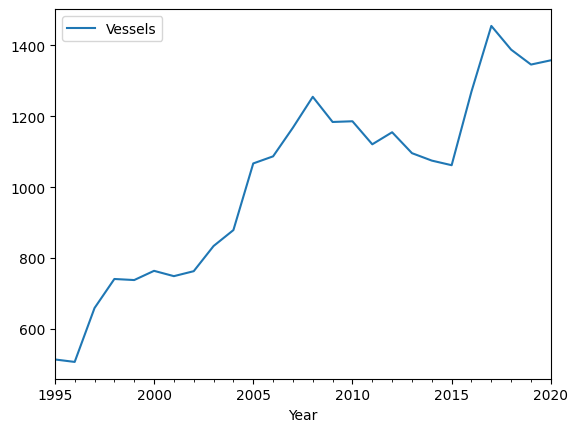

In [10]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adfuller_test(Vessels):
    result=adfuller(Vessels)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adfuller_test(df['Vessels'])

ADF Test Statistic : -2.710192506194862
p-value : 0.07229106635627301
#Lags Used : 9
Number of Observations Used : 16
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


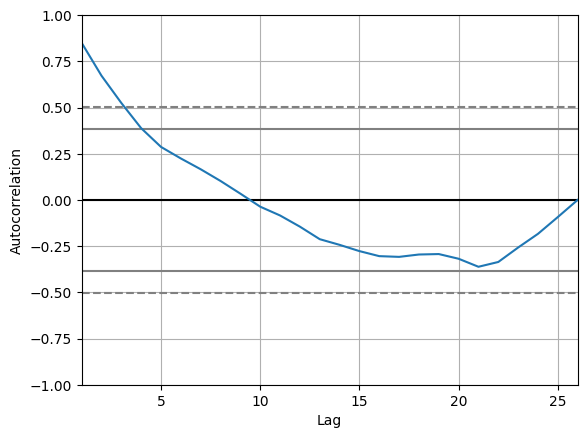

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Vessels'])
plt.show()

In [15]:
import statsmodels.api as sm

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


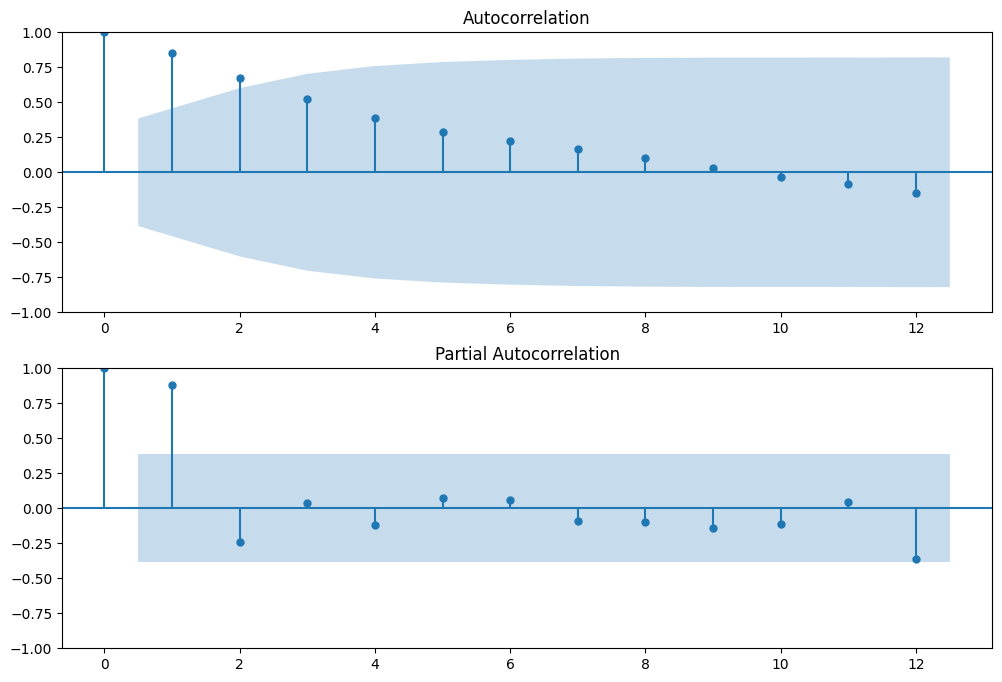

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Vessels'],lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Vessels'],lags=12,ax=ax2)

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
model=ARIMA(df['Vessels'],order=(1,0,1))
model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Vessels   No. Observations:                   26
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -153.001
Date:                Tue, 11 Apr 2023   AIC                            314.001
Time:                        04:55:59   BIC                            319.034
Sample:                    01-01-1995   HQIC                           315.451
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1016.0778    285.732      3.556      0.000     456.054    1576.102
ar.L1          0.9493      0.093     10.156      0.000       0.766       1.133
ma.L1          0.3108      0.232      1.342      0.180      -0.143       0.765
sigma2      6759.3855   1754.762      3.852      0.000    3320.114    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.64   Prob(JB):                         0.50
Heteroskedasticity (H):               2.08   Skew:                             0.57
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Year'>

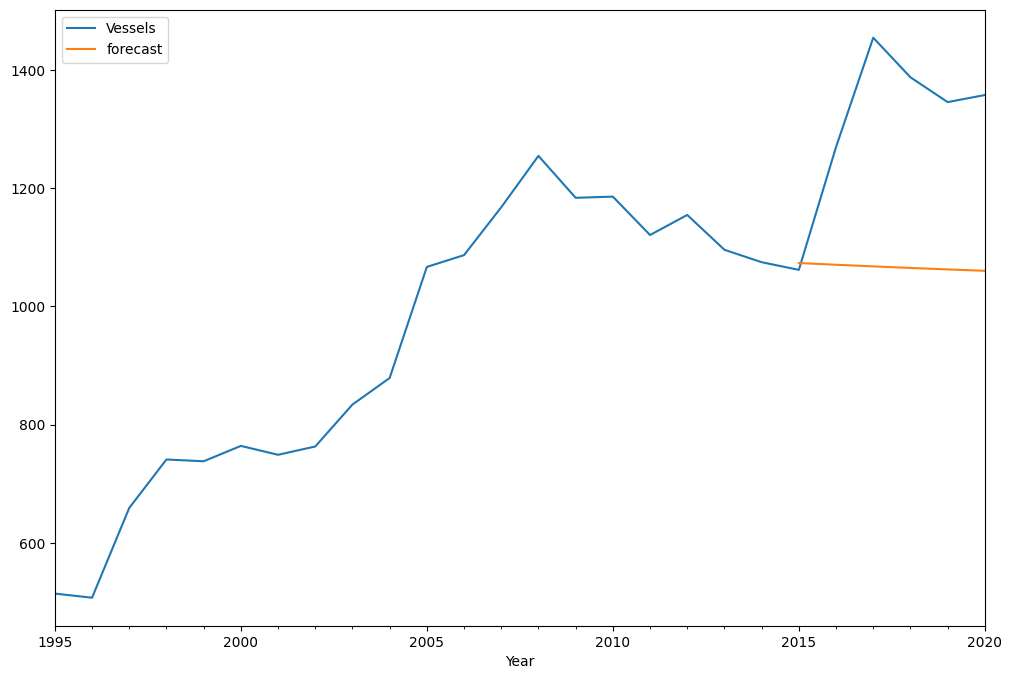

In [23]:
df['forecast']=model_fit.predict(start=20,end=26,dynamic=True)
df[['Vessels','forecast']].plot(figsize=(12,8))

In [24]:
model=sm.tsa.statespace.SARIMAX(df['Vessels'],order=(1, 0, 1),seasonal_order=(1,1,1,6))
results=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='Year'>

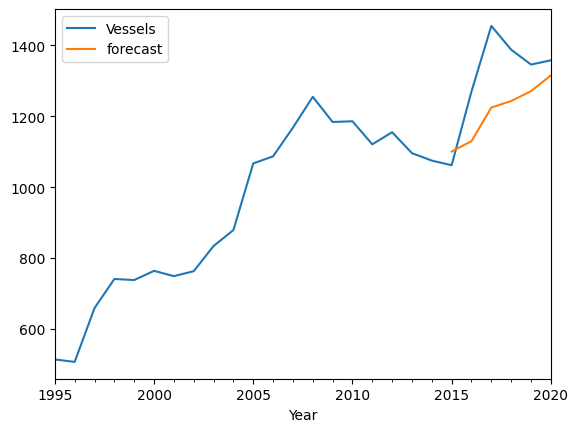

In [25]:
df['forecast']=results.predict(start=20,end=26,dynamic=True)
df[['Vessels','forecast']].plot()

In [26]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,6)]

In [27]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [28]:
future_datest_df.tail()

,Vessels,forecast
2021-01-01,NaN,NaN
2022-01-01,NaN,NaN
2023-01-01,NaN,NaN
2024-01-01,NaN,NaN
2025-01-01,NaN,NaN


In [29]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

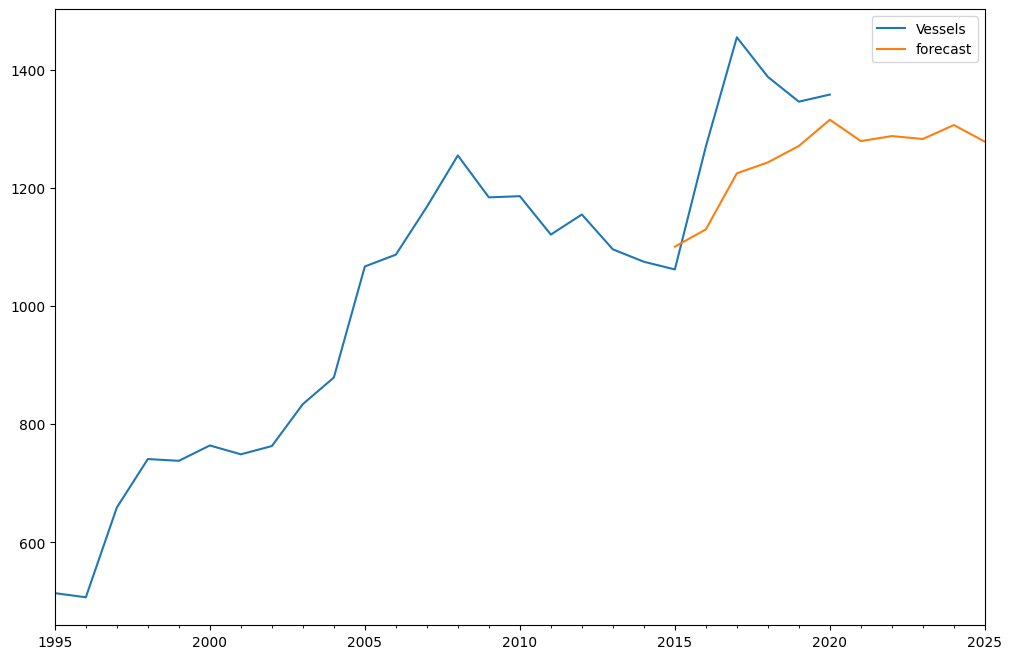

In [30]:
future_df['forecast'] = results.predict(start = 20, end = 32, dynamic= True)  
future_df[['Vessels', 'forecast']].plot(figsize=(12, 8))

In [31]:
future_df[['Vessels', 'forecast']]

,Vessels,forecast
1995-01-01,514,NaN
1996-01-01,507,NaN
1997-01-01,659,NaN
1998-01-01,741,NaN
1999-01-01,738,NaN
2000-01-01,764,NaN
2001-01-01,749,NaN
2002-01-01,763,NaN
2003-01-01,834,NaN
2004-01-01,879,NaN
